<a href="https://colab.research.google.com/github/abhishekmishra-bareilly/Deep-Learning/blob/main/Early_Stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# Import the dependancyes
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

## Data overview

In [91]:
# Creating the dataset of classification using make_circle function
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [92]:
y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [93]:
x[:5]

array([[-0.63640493, -0.36870191],
       [-0.24465976, -0.73659196],
       [-0.46597138, -1.06687743],
       [-0.70999784, -0.40841948],
       [ 0.70232238, -0.51730147]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


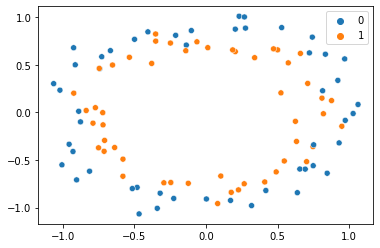

In [94]:
# Ploting the dataset
sns.scatterplot(x[:,0],x[:,1],hue=y)

## Feature engineering

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

## keras Model implimentation

In [79]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [80]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [81]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000)

Epoch 1/1000
3/3 [==============================] - 1s 80ms/step - loss: 0.6948 - accuracy: 0.4875 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 2/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.6924 - accuracy: 0.5250 - val_loss: 0.6980 - val_accuracy: 0.4500
Epoch 3/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.6915 - accuracy: 0.5000 - val_loss: 0.6990 - val_accuracy: 0.4000
Epoch 4/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.6899 - accuracy: 0.5125 - val_loss: 0.7013 - val_accuracy: 0.3500
Epoch 5/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.6887 - accuracy: 0.5375 - val_loss: 0.7031 - val_accuracy: 0.3500
Epoch 6/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.6877 - accuracy: 0.5500 - val_loss: 0.7045 - val_accuracy: 0.3500
Epoch 7/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.6871 - accuracy: 0.5375 - val_loss: 0.7063 - val_accuracy: 0.3500
Epoch 8/1000


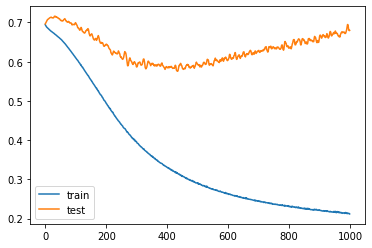

In [82]:
#Ploting the dataset
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

3888/3888 [==============================] - 5s 1ms/step


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


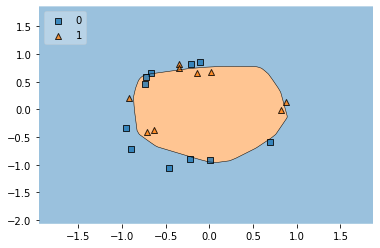

In [83]:
plot_decision_regions(x_test, y_test.ravel(), clf = model, legend=2)
plt.show()

Now we can easlly see the model is over fitted

## Early Stopping

In [96]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [97]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [99]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 70ms/step - loss: 0.6962 - accuracy: 0.5000 - val_loss: 0.7199 - val_accuracy: 0.3500
Epoch 2/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6945 - accuracy: 0.5250 - val_loss: 0.7187 - val_accuracy: 0.3500
Epoch 3/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6926 - accuracy: 0.5375 - val_loss: 0.7192 - val_accuracy: 0.3000
Epoch 4/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6915 - accuracy: 0.5375 - val_loss: 0.7191 - val_accuracy: 0.3500
Epoch 5/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6907 - accuracy: 0.5250 - val_loss: 0.7186 - val_accuracy: 0.3000
Epoch 6/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6897 - accuracy: 0.5375 - val_loss: 0.7186 - val_accuracy: 0.3500
Epoch 7/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6889 - accuracy: 0.5250 - val_loss: 0.7193 - val_accuracy: 0.2500
Epoch 8/3500


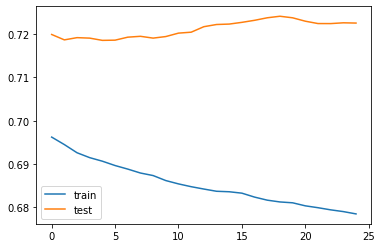

In [100]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

3888/3888 [==============================] - 4s 1ms/step


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


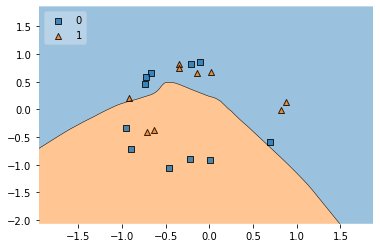

In [102]:
plot_decision_regions(x_test, y_test.ravel(), clf = model, legend=2)
plt.show()